## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
y = pd.DataFrame(boston.target, columns=["price"])

y.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [15]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

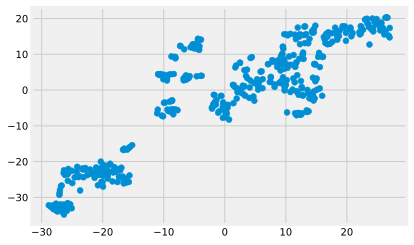

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [17]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [23]:
labels_train = kmeans.fit_predict(X_train_scaled)


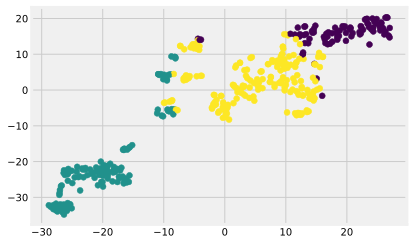

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [41]:
print('Кластер 0 Mean Price: {}'.format(y_train.loc[labels_train == 0,'price'].mean()))
print('Кластер 1 Mean Price: {}'.format(y_train.loc[labels_train == 1,'price'].mean()))
print('Кластер 2 Mean Price: {}'.format(y_train.loc[labels_train == 2,'price'].mean()))

Кластер 0 Mean Price: 27.788372093023252
Кластер 1 Mean Price: 16.165354330708666
Кластер 2 Mean Price: 24.958115183246072


In [40]:
print('Кластер 0 Mean CRIM: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1 Mean CRIM: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2 Mean CRIM: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0 Mean CRIM: 0.07356558139534886
Кластер 1 Mean CRIM: 10.797028425196853
Кластер 2 Mean CRIM: 0.42166020942408367


# * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [43]:
labels_test = kmeans.predict(X_test_scaled)

In [47]:
print('Кластер 0 Mean Price: {}'.format(y_test.loc[labels_test == 0,'price'].mean()))
print('Кластер 1 Mean Price: {}'.format(y_test.loc[labels_test == 1,'price'].mean()))
print('Кластер 2 Mean Price: {}'.format(y_test.loc[labels_test == 2,'price'].mean()))

Кластер 0 Mean Price: 31.35
Кластер 1 Mean Price: 16.437142857142856
Кластер 2 Mean Price: 21.860784313725492


In [48]:
print('Кластер 0 Mean CRIM: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1 Mean CRIM: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2 Mean CRIM: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0 Mean CRIM: 0.062060000000000004
Кластер 1 Mean CRIM: 10.165531142857143
Кластер 2 Mean CRIM: 0.26607882352941176
